In [105]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler

In [106]:
df = pd.read_csv("insurance.csv")

In [107]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [108]:
df['children'] = df['children'].astype("object")

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   object 
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 73.3+ KB


In [110]:
df.shape

(1338, 7)

In [111]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [112]:
categorical = [column for column in df.columns if df[column].dtype == "O"]
numeric = [column for column in df.columns if column not in categorical]

In [113]:
df.describe()

,age,bmi,charges
count,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,13270.422265
std,14.049960,6.098187,12110.011237
min,18.000000,15.960000,1121.873900
25%,27.000000,26.296250,4740.287150
50%,39.000000,30.400000,9382.033000
75%,51.000000,34.693750,16639.912515
max,64.000000,53.130000,63770.428010


C:\Users\darks\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


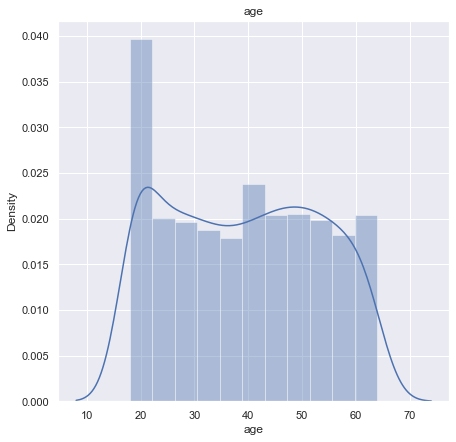

C:\Users\darks\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


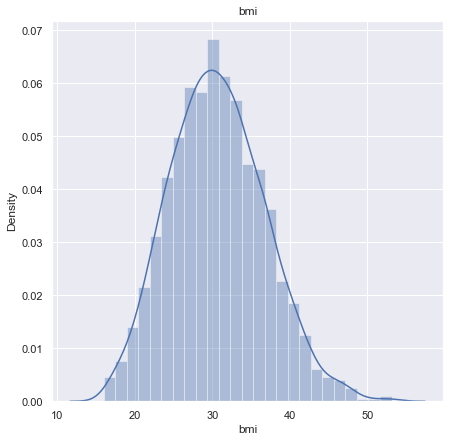

C:\Users\darks\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


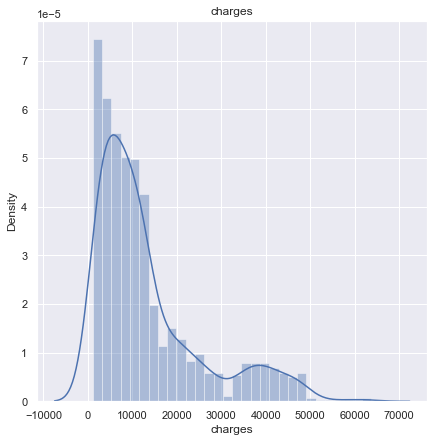

In [114]:
sns.set()

for column in numeric:
    plt.figure(figsize=(7,7))
    sns.distplot(df[column])
    plt.title(column)
    plt.show()

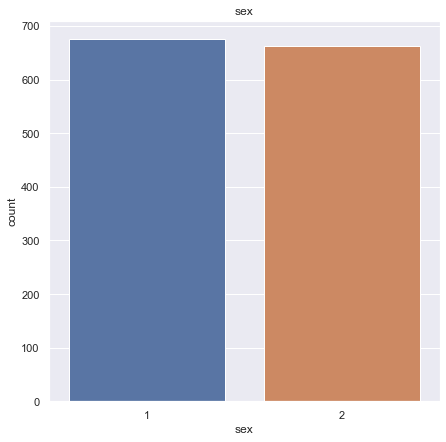

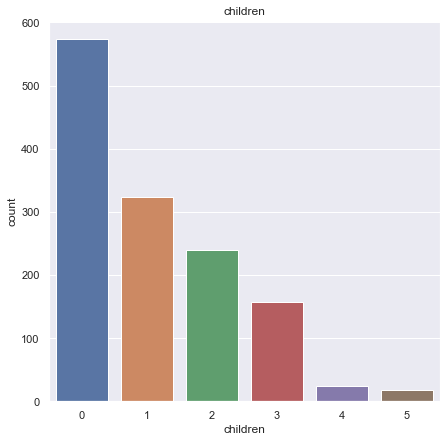

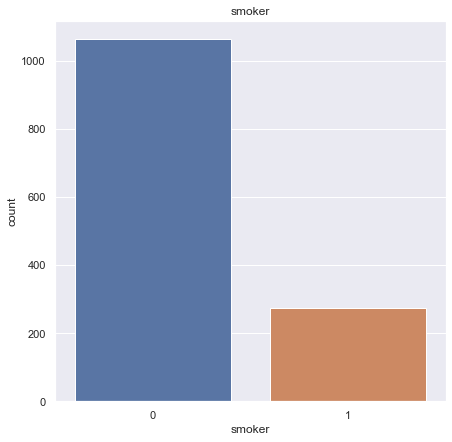

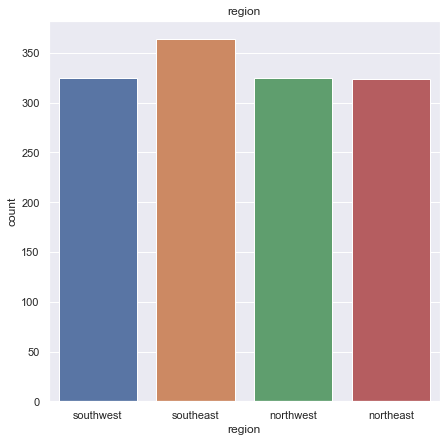

In [119]:
for column in categorical:
    plt.figure(figsize=(7,7))
    sns.countplot(x=column, data=df)
    plt.title(column)
    plt.show()

<AxesSubplot:>

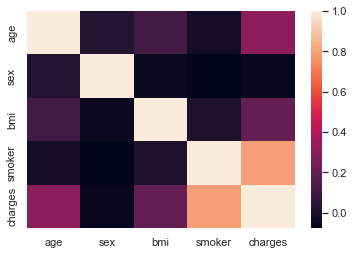

In [118]:
sns.heatmap(df.corr())

In [116]:
df.replace({"sex":{"male":1,"female":2}, "smoker":{"yes":1,"no":0}},inplace=True)

In [63]:
df = pd.concat([df, pd.get_dummies(df['region'])], axis=1).drop(['region'],axis=1)
df = pd.concat([df, pd.get_dummies(df['children'])], axis=1).drop(['children'],axis=1)

In [64]:
df.head()

,age,sex,bmi,smoker,charges,northeast,northwest,southeast,southwest,0,1,2,3,4,5
0,19,2,27.900,1,16884.92400,0,0,0,1,1,0,0,0,0,0
1,18,1,33.770,0,1725.55230,0,0,1,0,0,1,0,0,0,0
2,28,1,33.000,0,4449.46200,0,0,1,0,0,0,0,1,0,0
3,33,1,22.705,0,21984.47061,0,1,0,0,1,0,0,0,0,0
4,32,1,28.880,0,3866.85520,0,1,0,0,1,0,0,0,0,0


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1338 non-null   int64  
 1   sex        1338 non-null   int64  
 2   bmi        1338 non-null   float64
 3   smoker     1338 non-null   int64  
 4   charges    1338 non-null   float64
 5   northeast  1338 non-null   uint8  
 6   northwest  1338 non-null   uint8  
 7   southeast  1338 non-null   uint8  
 8   southwest  1338 non-null   uint8  
 9   0          1338 non-null   uint8  
 10  1          1338 non-null   uint8  
 11  2          1338 non-null   uint8  
 12  3          1338 non-null   uint8  
 13  4          1338 non-null   uint8  
 14  5          1338 non-null   uint8  
dtypes: float64(2), int64(3), uint8(10)
memory usage: 65.5 KB


In [66]:
#implement Standard scaler

In [67]:
s = StandardScaler()

In [68]:
s_df = s.fit_transform(df[['bmi','age']])

In [69]:
s_df

array([[-0.45332   , -1.43876426],
       [ 0.5096211 , -1.50996545],
       [ 0.38330685, -0.79795355],
       ...,
       [ 1.0148781 , -1.50996545],
       [-0.79781341, -1.29636188],
       [-0.26138796,  1.55168573]])

In [70]:
s_df = pd.DataFrame(s_df, columns=df[['bmi','age']].columns.values)

In [71]:
df.head()

,age,sex,bmi,smoker,charges,northeast,northwest,southeast,southwest,0,1,2,3,4,5
0,19,2,27.900,1,16884.92400,0,0,0,1,1,0,0,0,0,0
1,18,1,33.770,0,1725.55230,0,0,1,0,0,1,0,0,0,0
2,28,1,33.000,0,4449.46200,0,0,1,0,0,0,0,1,0,0
3,33,1,22.705,0,21984.47061,0,1,0,0,1,0,0,0,0,0
4,32,1,28.880,0,3866.85520,0,1,0,0,1,0,0,0,0,0


In [72]:
df1 = df.drop(columns=['age','bmi'],axis=1)

In [73]:
df1 = pd.concat([df1, s_df], axis=1)

In [74]:
df1.head()

,sex,smoker,charges,northeast,northwest,southeast,southwest,0,1,2,3,4,5,bmi,age
0,2,1,16884.92400,0,0,0,1,1,0,0,0,0,0,-0.453320,-1.438764
1,1,0,1725.55230,0,0,1,0,0,1,0,0,0,0,0.509621,-1.509965
2,1,0,4449.46200,0,0,1,0,0,0,0,1,0,0,0.383307,-0.797954
3,1,0,21984.47061,0,1,0,0,1,0,0,0,0,0,-1.305531,-0.441948
4,1,0,3866.85520,0,1,0,0,1,0,0,0,0,0,-0.292556,-0.513149


In [75]:
X = df1.drop(['charges'],axis=1)
y = df1['charges']

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42) 

In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [78]:
lg = LinearRegression()

In [79]:
ml1 = lg.fit(X_train, y_train)

In [80]:
ml1.score(X_test,y_test)

0.7843246077701619

In [173]:
y_predlr1 = ml1.predict(X_test)

In [193]:
msereg1 = mean_squared_error(y_predlr1, y_test)
r2reg1 = r2_score(y_predlr1, y_test)

In [194]:
mean_squared_error(y_pred, y_test)

19895797.13587396

In [195]:
r2_score(y_predlr1, y_test)

0.7080861104385564

In [84]:
# implement min_max_scaler

In [92]:
mm = MinMaxScaler()

In [93]:
mm_df = mm.fit_transform(df[['bmi','age']])

In [94]:
mm_df = pd.DataFrame(mm_df, columns=df[['bmi','age']].columns.values)

In [95]:
df2 = df.drop(columns=['age','bmi'],axis=1)

In [96]:
df2 = pd.concat([df2, mm_df], axis=1)

In [97]:
df2.head()

,sex,smoker,charges,northeast,northwest,southeast,southwest,0,1,2,3,4,5,bmi,age
0,2,1,16884.92400,0,0,0,1,1,0,0,0,0,0,0.321227,0.021739
1,1,0,1725.55230,0,0,1,0,0,1,0,0,0,0,0.479150,0.000000
2,1,0,4449.46200,0,0,1,0,0,0,0,1,0,0,0.458434,0.217391
3,1,0,21984.47061,0,1,0,0,1,0,0,0,0,0,0.181464,0.326087
4,1,0,3866.85520,0,1,0,0,1,0,0,0,0,0,0.347592,0.304348


In [123]:
X = df2.drop(['charges'],axis=1)
y = df2['charges']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size = 0.2,random_state=42) 

In [124]:
ml2 = lg.fit(X_train2,y_train2)

In [125]:
ml2.score(X_test2,y_test2)

0.7832007001631353

In [172]:
y_predlr2 = ml2.predict(X_test2)

In [209]:
msereg2 = mean_squared_error(y_predlr2, y_test2)
r2reg2 = r2_score(y_predlr2, y_test2)

In [127]:
mean_squared_error(y_pred2, y_test2)

33657816.287977904

In [128]:
r2_score(y_pred2, y_test2)

0.7080861104385564

In [136]:
#implement SVM
from sklearn.tree import DecisionTreeRegressor

In [137]:
tr = DecisionTreeRegressor()

In [138]:
tr.fit(X_train, y_train)

DecisionTreeRegressor()

In [160]:
y_preddt1 = tr.predict(X_test)

In [162]:
msedt1 = mean_squared_error(y_preddt1, y_test)
r2dt1 = r2_score(y_preddt1, y_test)

In [140]:
mean_squared_error(y_pred, y_test)

50118438.88791594

In [155]:
r2_score(y_pred, y_test)

0.8447244743705804

In [157]:
tr.fit(X_train2, y_train2)

DecisionTreeRegressor()

In [158]:
y_preddt2 = tr.predict(X_test2)

In [206]:
msedt2 = mean_squared_error(y_preddt2, y_test2)
r2dt2 = r2_score(y_preddt2, y_test2)

In [143]:
from sklearn.linear_model import SGDRegressor

In [144]:
sgdr = SGDRegressor() 

In [145]:
sgdr.fit(X_train, y_train)

SGDRegressor()

In [163]:
y_predsgd1 = sgdr.predict(X_test)

In [165]:
msesgd1 = mean_squared_error(y_predsgd1, y_test)
r2sgd1 = r2_score(y_predsgd1, y_test)

In [166]:
sgdr.fit(X_train2, y_train2)

SGDRegressor()

In [167]:
y_predsgd2 = sgdr.predict(X_test2)
msesgd2 = mean_squared_error(y_predsgd2, y_test2)
r2sgd2 = r2_score(y_predsgd2, y_test2)

In [168]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor

In [151]:
reg1 = GradientBoostingRegressor(random_state=1)
reg2 = RandomForestRegressor(random_state=1)
reg3 = LinearRegression()
ereg = VotingRegressor(estimators=[('gb', reg1), ('rf', reg2), ('lr', reg3)])
ereg = ereg.fit(X_train, y_train)

In [196]:
y_predereg1 = ereg.predict(X_test)
mseereg1 = mean_squared_error(y_predereg1, y_test)
r2ereg1 = r2_score(y_predereg1, y_test)

In [197]:
ereg = ereg.fit(X_train2, y_train2)

In [198]:
y_predereg2 = ereg.predict(X_test)
mseereg2 = mean_squared_error(y_predereg2, y_test2)
r2ereg2 = r2_score(y_predereg2, y_test2)

In [212]:
results = pd.DataFrame({"MSE_standardScaled": [msereg1,msesgd1,msedt1,mseereg1], "R2_standardScaled":[r2reg1,r2sgd1,r2dt1,r2ereg1], 
                         "MSE_MinMaxScaled":[msereg2,msesgd2,msedt2,mseereg2],"R2_MinMaxScaled":[r2reg2,r2sgd2,r2dt2,r2ereg2] }
                         ,index = ['LinearRegression','SGDRegressor','DecisionTreeRegressor','VotingRegressor'])

In [216]:
results = results.T

In [217]:
results

,MSE_standardScaled,R2_standardScaled,MSE_MinMaxScaled,R2_MinMaxScaled
LinearRegression,3.365782e+07,0.708086,3.365782e+07,0.708086
SGDRegressor,3.412855e+07,0.696844,3.398682e+07,0.699856
DecisionTreeRegressor,5.114056e+07,0.711936,5.114056e+07,0.711936
VotingRegressor,1.989580e+07,0.844724,1.989580e+07,0.844724


<AxesSubplot:>

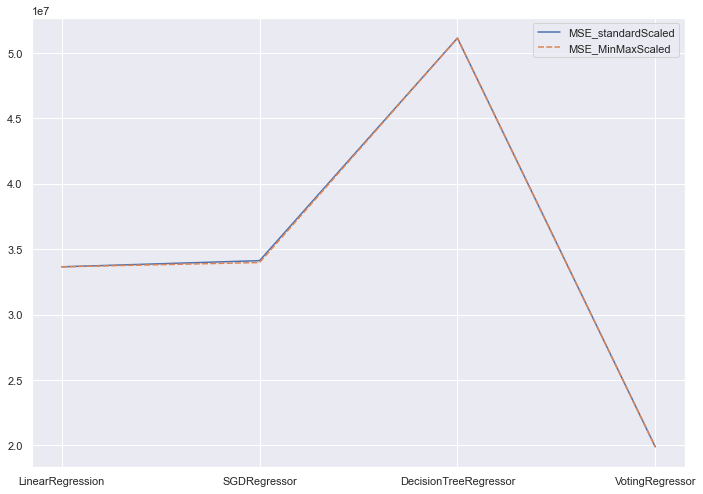

In [238]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(data=results[['MSE_standardScaled','MSE_MinMaxScaled']])

<AxesSubplot:>

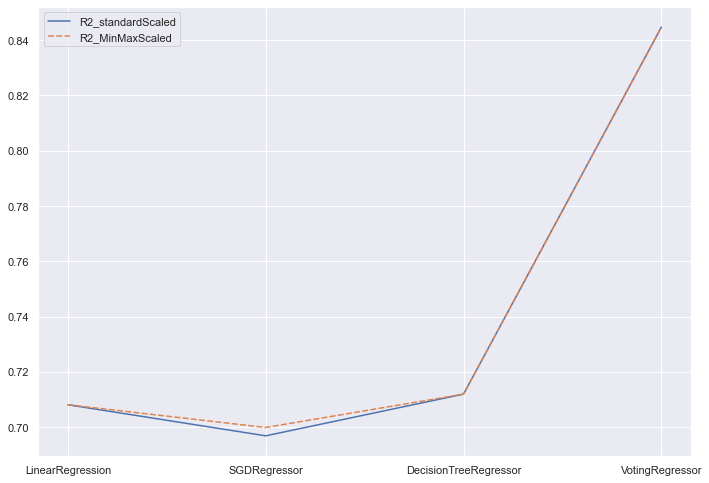

In [239]:
sns.lineplot(data=results[['R2_standardScaled','R2_MinMaxScaled']])